In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math


In [119]:
movement_data = pd.DataFrame(dtype=float)
movement_data = pd.read_csv("data/cleaned_puryear_movement.csv")

audio_data = pd.DataFrame(dtype=float)
audio_data = pd.read_csv("data/cleaned_puryear_audio.csv")
audio_data.columns = ["Date","Headphone sound levels(dBASPL)"]

sleep_data = pd.DataFrame(dtype=float)
sleep_data = pd.read_csv("data/cleaned_puryear_sleep.csv")
sleep_data.columns = ["Date","Time in bed(hr)"]

# interpolate audio data

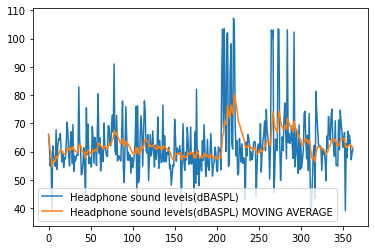

In [120]:
# interpolate audio data
audio_data.mask((audio_data["Headphone sound levels(dBASPL)"] <= 30) & (audio_data["Headphone sound levels(dBASPL)"] <= 100),inplace=True)
audio_data.interpolate(method="cubic",inplace=True)
audio_data.fillna(method="bfill",inplace=True)

audio_data_combined = pd.concat([audio_data, audio_data["Headphone sound levels(dBASPL)"].ewm(alpha=0.111).mean()])
audio_data_combined.columns=["Date","Headphone sound levels(dBASPL)","Headphone sound levels(dBASPL) MOVING AVERAGE"]

ax = audio_data_combined.plot()
fig = ax.get_figure()
fig.savefig("figures/moving_avg_audio_graph.jpg",dpi=1000)

<img src="figures\moving_avg_audio_graph.jpg" width="600"/>